Dataset Head:
   PID  Names           Date Brand                                Comment  \
0  775    NaN  July 19, 2024  Uber  I was very disappointed with my last…   
1  776    NaN  July 10, 2024  Uber              DONT SIGN-UP FOR UBER ONE   
2  777    NaN  July 15, 2024  Uber      I've been a loyal Uber/Uber Eats…   
3  778    NaN  July 08, 2024  Uber       If I could give these thieves a…   
4  779    NaN  July 11, 2024  Uber            Horrible company all around   

    Outcome Source_File          Name                       Cleaned_Comment  \
0  Negative   Uber.xlsx     cv stefan  i was very disappointed with my last   
1  Negative   Uber.xlsx    Sonia Diaz             dont sign up for uber one   
2  Negative   Uber.xlsx   Eliza Power      i ve been a loyal uber uber eats   
3  Negative   Uber.xlsx  Leonard Hunt       if i could give these thieves a   
4  Negative   Uber.xlsx     Marco Dee           horrible company all around   

   Polarity_Combined  Score_0_10 Sentiment_Label

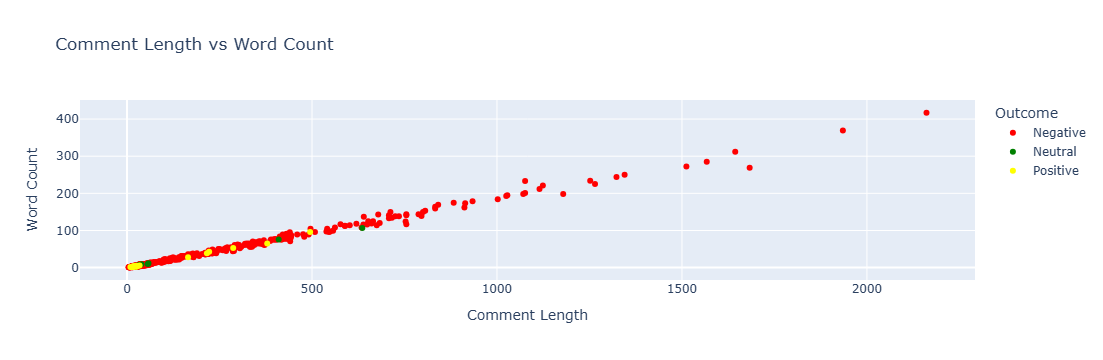

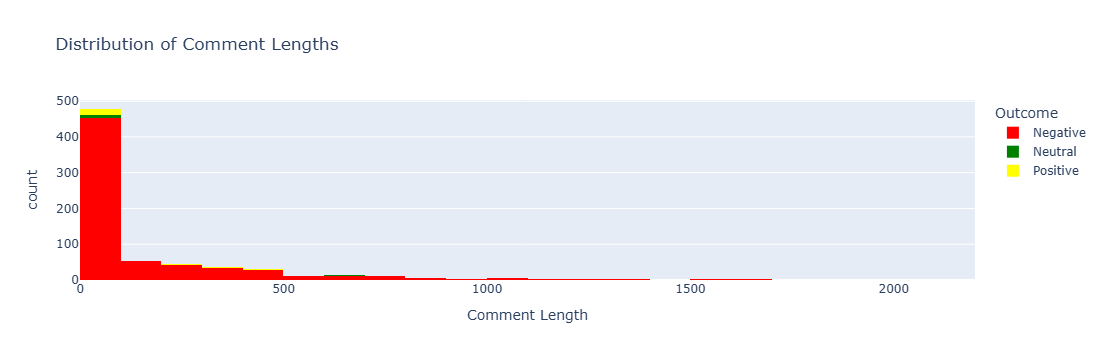

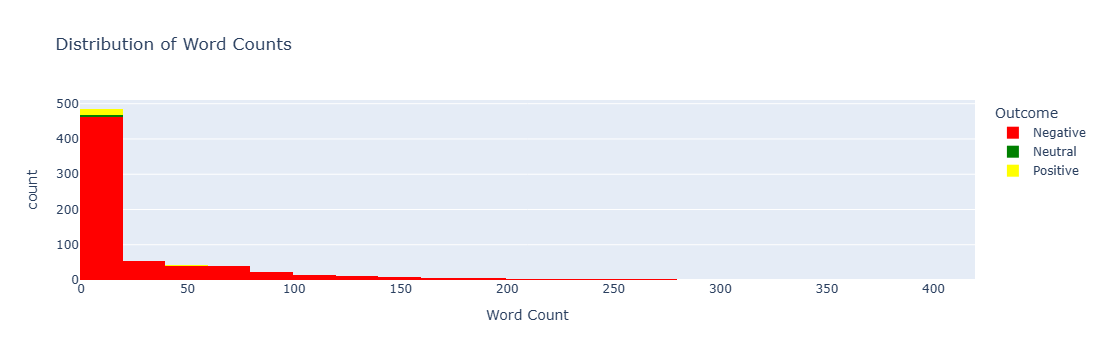


Top 20 Bigrams:
                  count
customer service     72
uber eats            31
use uber             28
uber driver          22
using uber           22
used uber            18
uber app             15
uber drivers         13
worst customer       12
customer support     11
uber customer        10
driver did            9
don use               9
uber cash             9
debit card            8
don care              7
cleaning fee          7
uber taxi             7
minutes away          7
driver uber           7


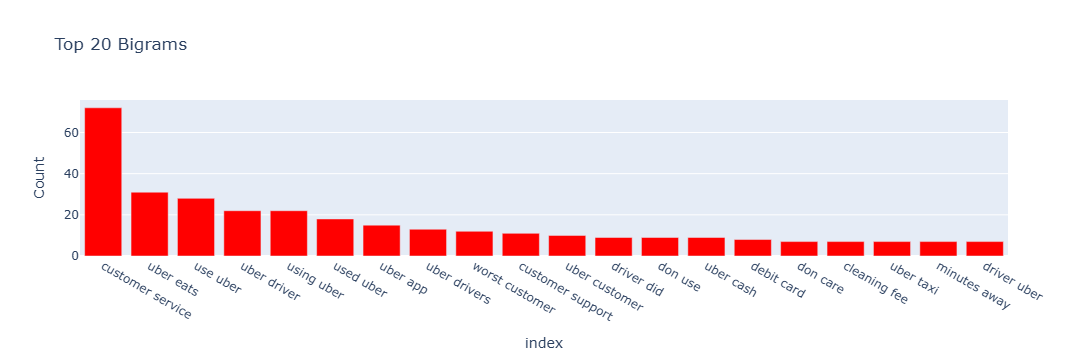


Top 20 Trigrams:
                           count
worst customer service        11
terrible customer service      6
ve used uber                   5
don use uber                   4
bad customer service           4
uber money account             3
charged cleaning fee           3
uber customer support          3
money uber money               3
time using uber                3
den haag station               3
contact customer service       3
uber eats uber                 3
use uber eats                  3
poor customer service          3
using uber years               2
uber customer years            2
uber customer service          2
using uber issue               2
eats customer service          2


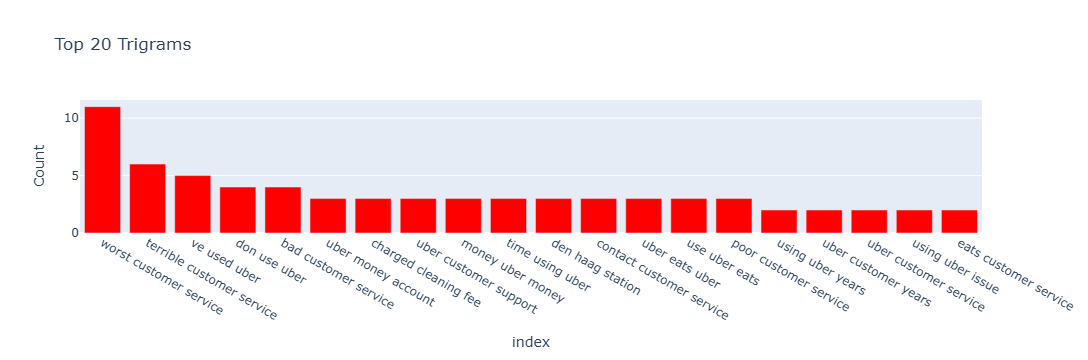

In [3]:
import pandas as pd 
import plotly.express as px 
from sklearn.feature_extraction.text import CountVectorizer 

# Load your dataset 
file_path = r"C:\Users\har15\Downloads\ba proj\post-data\Uber_Graded.xlsx"  # Update this with your actual file path
df = pd.read_excel(file_path) 

# Basic EDA 
print("Dataset Head:") 
print(df.head()) 
print("\nMissing Values:") 
print(df.isnull().sum()) 

# Replace NaN values with an empty string before applying the length function
df['comment_length'] = df['Comment'].fillna('').apply(len)
df['word_count'] = df['Comment'].fillna('').apply(lambda x: len(x.split())) 

# Interactive scatter plot for comment length vs word count 
fig = px.scatter(df, x='comment_length', y='word_count', 
                 color='Outcome', 
                 title='Comment Length vs Word Count', 
                 labels={'comment_length': 'Comment Length', 
                         'word_count': 'Word Count'}, 
                 hover_data=['Comment'],
                 color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig.show() 

# Interactive histogram for comment lengths 
fig_length = px.histogram(df, x='comment_length', nbins=30, 
                          color='Outcome', 
                          title='Distribution of Comment Lengths', 
                          labels={'comment_length': 'Comment Length'},
                          color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_length.show() 

# Interactive histogram for word counts 
fig_word_count = px.histogram(df, x='word_count', nbins=30, 
                              color='Outcome', 
                              title='Distribution of Word Counts', 
                              labels={'word_count': 'Word Count'},
                              color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_word_count.show() 

# N-gram analysis function 
def get_ngrams(comments, n=2, top_n=20):  
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words='english') 
    ngrams = vectorizer.fit_transform(comments) 
    ngram_counts = ngrams.sum(axis=0) 
    ngram_features = vectorizer.get_feature_names_out() 
    # Create a DataFrame of n-grams and their counts 
    ngram_df = pd.DataFrame(ngram_counts.A1, index=ngram_features, columns=['count']) 
    return ngram_df.sort_values(by='count', ascending=False).head(top_n) 

# Generate and display bigrams 
comments = df['Comment'].dropna() 
bigrams = get_ngrams(comments, n=2, top_n=20)  
print("\nTop 20 Bigrams:") 
print(bigrams) 

# Bar plot for bigrams 
fig_bigrams = px.bar(bigrams, x=bigrams.index, y='count', 
                     title='Top 20 Bigrams', 
                     labels={'x': 'Bigrams', 'count': 'Count'},
                     color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_bigrams.show() 

# Generate and display trigrams 
trigrams = get_ngrams(comments, n=3, top_n=20)  
print("\nTop 20 Trigrams:") 
print(trigrams) 

# Bar plot for trigrams 
fig_trigrams = px.bar(trigrams, x=trigrams.index, y='count', 
                      title='Top 20 Trigrams', 
                      labels={'x': 'Trigrams', 'count': 'Count'},
                      color_discrete_sequence=['red', 'green', 'yellow'])  # Custom colors
fig_trigrams.show()
